<a href="https://colab.research.google.com/github/mathdeoliveira/Portfolio_DataScience/blob/master/Analisando_os_dados_sobre_o_Coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

<center><img alt="Barcelona, Spain (Photo: Getty) GETTY" width="50%" src="https://pict.sindonews.net/dyn/620/content/2020/01/28/207/1509334/pakar-ungkap-struktur-kristal-virus-corona-CLx.jpg"></center>

Neste **notebook** vamos estudar sobre o 2019 Novel Coronavirus (2019-nCoV), identificado os casos confirmados, as mortes e os casos de recuperação. Qual local foi cada tipo dos casos e a evolução da doença ao longo do tempo.

## Sobre o coronavírus

De acordo com o site do [Ministério da Saúde](https://www.saude.gov.br/saude-de-a-z/coronavirus), coronavírus já é um vírus existente e conhecido que causa infecções respiratórias, esse vírus é bastante mutável, assim, ao decorrer do tempo o vírus sofre mutação, criado assim o **nCoV-2019**.

O **nCoV-2019** teve registro no fim de dezembro de 2019, na China, e após isso, o vírus se espalhou para mais de 18 países. Esse vírus se iniciou em um mercado de animais na cidade de Wuhan, China. Por ser rápido e fácil a sua transmissão, organismos internacionais e a comunidade científica está na busca por respostas sobre prevenção, transmissão e tratamento desse novo tipo de coronavírus.

# Obtenção dos dados

Os dados dessa análise foi retirado do site [Kaggle](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset), mas quem fez todo o processo foi a [Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19), créditos totais para eles.

## Informações sobre os atributos

* `Sno` - Número serial
* `Date` - Data e hora da observação no formato MM/DD/YYYY HH:MM:SS
* `Province / State` - Província ou Estado da observação
* `Country` - País da observação
* `Last Update` - Hora no UTC em que a linha é atualizada para a província ou país em questão.
* `Confirmed` - Número de casos confirmados
* `Deaths` - Número de mortes
* `Recovered` - Números de casos recuperados

# Importação dos dados

Etapa onde vamos importar os pacotes para Python necessários e o nosso conjunto de dados mencionado acima.

In [0]:
# import de bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.graph_objects as go

In [3]:
# leitura dos nossos dados e mostrar primeiras linhas
df = pd.read_csv('https://raw.githubusercontent.com/mathdeoliveira/files/master/2019_nCoV_data.csv')
df.head()

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0


# Análise Inicial dos Dados

Etapa inicial de análise dos dados, verificar qual o tamanho do nosso dataset, a qualidade dos dados e tipos das colunas.

#### Qual o tamanho do nosso dataset?

In [0]:
# mostrar a quantidade de dados e variáveis do nosso dataset
print('Quantidade de entradas:', df.shape[0])
print('Quantidade de atributos:', df.shape[1])

Quantidade de entradas: 1199
Quantidade de atributos: 8


#### Existem valores ausente no dataset?

In [0]:
# somar a quantidade de dados ausentes para cada atributo
df.isnull().sum()

Sno                 0
Date                0
Province/State    311
Country             0
Last Update         0
Confirmed           0
Deaths              0
Recovered           0
dtype: int64

Foi encontrado dados ausentes no atributo de Province/State, de acordo com a documentação dos dados, caso viessem nulos é por que a informação foi perdida.

#### Quais são os tipos de cada atributo?

In [0]:
# mostrar os tipos de cada atributo
df.dtypes

Sno                 int64
Date               object
Province/State     object
Country            object
Last Update        object
Confirmed         float64
Deaths            float64
Recovered         float64
dtype: object

# Análise Exploratória dos Dados


Fase de exploração dos dados, vamos entender o impacto desse novo vírus em todo o mundo, visualizar de forma gráfica os dados. Vou seguir duas proposta para explorar e ao decorrer vou inserir novas formas:
* Alterações no número de casos afetados ao longo do tempo
* Mudança de casos ao longo do tempo no nível do país

In [0]:
# removendo duas colunas que não são úteis, Sno e Last Update
df.drop(['Sno', 'Last Update'], axis=1, inplace=True)

# transformando o campo Date para datetime
df['Date'] = df['Date'].apply(pd.to_datetime)

#### Resumo estatístico

In [0]:
df.describe()

,Confirmed,Deaths,Recovered
count,1199.000000,1199.000000,1199.000000
mean,276.213511,5.961635,14.617181
std,1966.264622,58.082724,103.959136
min,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000
50%,10.000000,0.000000,0.000000
75%,82.000000,0.000000,2.000000
max,31728.000000,974.000000,2222.000000


#### Qual o nosso range de datas?



In [0]:
# mostrar inicio e fim da data dos registros
print('O início dos registros são de', df.Date.min())
print('O fim dos registros são de', df.Date.max())

O início dos registros são de 2020-01-22 12:00:00
O fim dos registros são de 2020-02-10 19:30:00


Com o resultado acima conseguimos que os dados começam no dia 22 de Janeiro de 2020 e se encerra no dia de 10 de Fevereiro de 2020.

#### Quais são os países afetados pelo novo vírus?

In [38]:
# Existe China duas vezes no dataset, uma com Mainland China e a outra China, vamos transformar tudo para somente China
df['Country'].replace({'Mainland China':'China'},inplace=True)
# mostra os países afetados e o número total
print(f'Os países afetados pelo novo vírus são: {df.Country.unique()} um total de {len(df.Country.unique())} países.')

Os países afetados pelo novo vírus são: ['China' 'US' 'Japan' 'Thailand' 'South Korea' 'Hong Kong' 'Macau'
 'Taiwan' 'Singapore' 'Philippines' 'Malaysia' 'Vietnam' 'Australia'
 'Mexico' 'Brazil' 'France' 'Nepal' 'Canada' 'Cambodia' 'Sri Lanka'
 'Ivory Coast' 'Germany' 'Finland' 'United Arab Emirates' 'India' 'Italy'
 'Sweden' 'Russia' 'Spain' 'UK' 'Belgium' 'Others'] um total de 32 países.


#### Qual é a quantidade de pessoas afetadas pelo vírus?

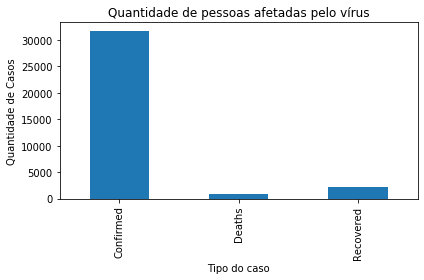

In [0]:
# temos que pessoas afetadas são os casos confirmados, mortes e casos recuperados
fig, ax= plt.subplots()

df[['Confirmed','Deaths', 'Recovered']].max().plot(kind='bar', ax=ax)
ax.set_title("Quantidade de pessoas afetadas pelo vírus")
ax.set_ylabel("Quantidade de Casos")
ax.set_xlabel("Tipo do caso")
plt.tight_layout()

#### Qual o número de casos por países?

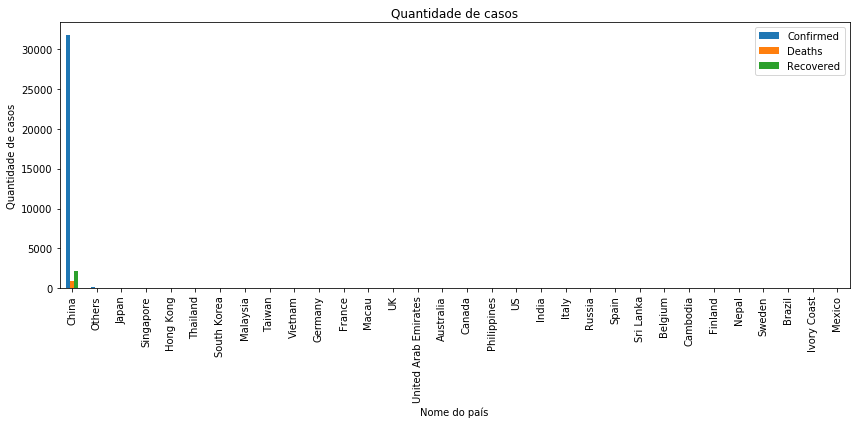

In [0]:
# criar um novo dataframe onde recebera os paises e totais dos seus casos
# plotar o gráfico

casos = pd.DataFrame(df.groupby('Country')['Confirmed','Deaths','Recovered'].max().sort_values(by=['Confirmed','Deaths','Recovered'], ascending = False))
casos['Country'] =casos.index
casos.drop('Country', axis=1, inplace=True)

fig, ax = plt.subplots(figsize=(12,6))

casos.plot(kind='bar', ax=ax)
ax.set_title('Quantidade de casos')
ax.set_ylabel('Quantidade de casos')
ax.set_xlabel('Nome do país')
plt.tight_layout()

Com o gráfico acima podemos confirmar que a China é o país que está mais sendo afetado pelo novo vírus.

#### Qual foi a alteração de números de pessoas afetadas ao longo do tempo?

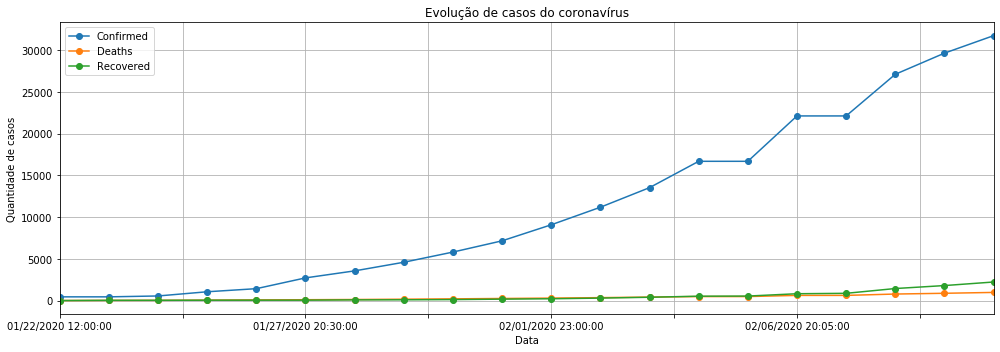

In [0]:
# criar novo dataframe com as datas e os totais de cada caso
# plotar gráfico

casos_tempo = df.groupby('Date')['Confirmed','Deaths','Recovered'].max()
casos_tempo['Date']=casos_tempo.index
casos_tempo.drop('Date', axis=1, inplace=True)

fig, ax = plt.subplots(figsize = (14,5))

casos_tempo.plot(kind='line', marker='o', ax=ax)
ax.set_title('Evolução de casos do coronavírus')
ax.set_xlabel('Data')
ax.set_ylabel('Quantidade de casos')
ax.grid()
plt.tight_layout()

É nítido que o número de casos confirmados está em crescimento, mas vemos que os casos de recuperação estão maiores que os casos de mortes. Mais para frente vamos identificar qual é a taxa de mortalidade para esse vírus.

### Análise mais aprofundada dos casos da China

Vimos que a China é o país mais afetado, vamos olhar somente para os dados registrados nesse país.

In [7]:
# criar um novo dataframe cópia do original filtrando somente registros do país China

df_china = df.loc[df['Country'] == 'China'].copy()
#df_china.drop(['Sno', 'Last Update'], axis=1, inplace=True)
df_china.head()

,Date,Province/State,Country,Confirmed,Deaths,Recovered
0,2020-01-22 12:00:00,Anhui,China,1.0,0.0,0.0
1,2020-01-22 12:00:00,Beijing,China,14.0,0.0,0.0
2,2020-01-22 12:00:00,Chongqing,China,6.0,0.0,0.0
3,2020-01-22 12:00:00,Fujian,China,1.0,0.0,0.0
4,2020-01-22 12:00:00,Gansu,China,0.0,0.0,0.0


#### Qual é a porcentagem de mortos sobre os casos confirmados?

In [8]:
# calcular porcentagem
(df_china['Deaths'].max() / df_china['Confirmed'].max())*100

3.069843671205245

Temos que 3% dos casos totais confirmados foram mortes registradas. Sendo assim a taxa de morte do vírus não é alta, em comparação com outros casos, por exemplo o SARS.

#### Qual foi o avanço do virus por dia?

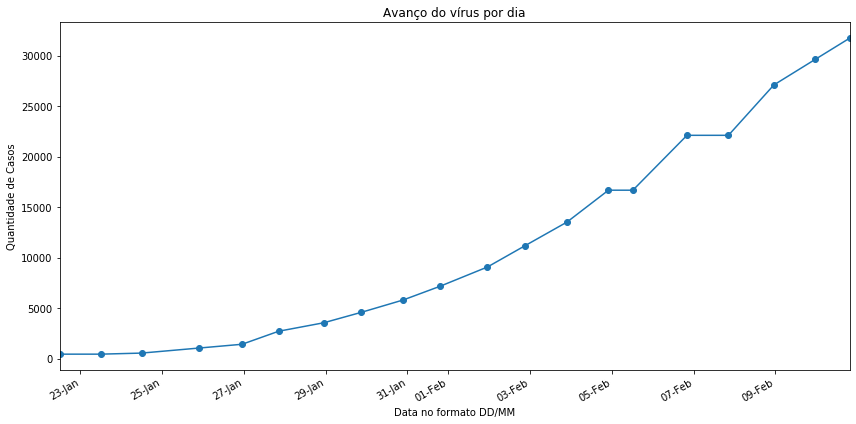

In [14]:
# transformar a coluna Date em data do pandas para formatar da maneira DD/MM
# plotar o gráfico
df_china['Date'] = pd.to_datetime(df_china['Date'])

fig, ax = plt.subplots(figsize=(12,6))

df_china.groupby('Date').Confirmed.max().plot(kind='line', marker='o', ax=ax)
ax.set_title('Avanço do vírus por dia')
ax.set_xlabel('Data no formato DD/MM')
ax.set_ylabel('Quantidade de Casos')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))

plt.tight_layout()

Ao decorrer dos dias do mês de Janeiro e Fevereiro, o vírus se espalhou, aumentando exponencialmente as vítimas do vírus ao longo dos dias. Lembrando que esse arquivo deve ser atualizado diariamente, podendo assim que os valores continuem a aumentar ou começam a diminuir, caso cura seja criada.

#### Qual província/estado foi a mais afetada?

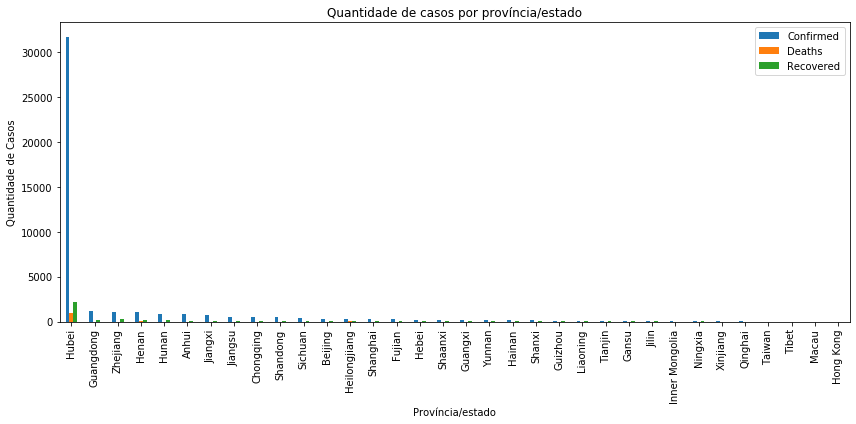

In [18]:
fig, ax = plt.subplots(figsize=(12,6))

df_china.groupby('Province/State')['Confirmed','Deaths','Recovered'].max().sort_values(by='Confirmed', ascending = False).plot(kind='bar', ax=ax)
ax.set_title('Quantidade de casos por província/estado')
ax.set_xlabel('Província/estado')
ax.set_ylabel('Quantidade de Casos')

plt.tight_layout()

A província/estado mais afetada foi a de Hubei, China. Podemos identificar a quantidade de pessoas afetadas pelo vírus nessa província em comparação com outras províncias da China.

Foram mostrados alguns insights sobre o vírus na China, como já visto, no país se concentra a maior parte dos casos e na província de Hubei temos concentração dos casos, para uma análise futura, podemos detalhar melhor o avanço do vírus para essa província.

# Conclusão

A China foi o onde se teve o início desse novo vírus, assim com a análise feita vimos que o país mais afetado com esse novo vírus, e aliado com o poder de transmissão desse vírus identificamos avanço do vírus em diferentes países, incluindo a China, já que seu território é gigante, com isso transformando esse novo víru em um problema de saúde global. 

Os casos ainda não pararam de crescer, indicando que os números de casos tendem aumentar ainda mais, a população ainda espera a vacina para barrar o avanço do vírus e curar os pacientes que estão em hospitais em tratamento.

A taxa de mortalidade desse novo coronavírus não é tão alta quanto o coronavírus SARS, que se espalhou pela Ásia em 2002 e 2003, matou 774 pessoas, 9,6% do total de infectados. Já o MERS, que predominou no Oriente Médio em 2012, teve uma taxa de mortalidade de 34,4%, matando 858 infectados.

Abaixo é o indicador de mortes até então pelo nCoV-2019 globalmente.


In [59]:
#@title
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = df.Deaths.max()
    ))

fig.update_layout(
    grid = {'rows': 1, 'columns': 1, 'pattern': "independent"},
    template = {'data' : {'indicator': [{
        'title': {'text': "Mortes pelo nCoV-2019"},
        'delta' : {'reference': 90}}]
                         }})